### Analysis of results of one-zone MC simulations of the n-capture reaction rate uncertainties 

In [31]:
%pylab nbagg

from NuGridPy import utils

from scipy import stats
from scipy.stats import norm

def select_fig(ifig,close_fig=True):
    if close_fig:
        plt.close(ifig)
    plt.figure(ifig)

# begin counting figures
ifig=0
for i in range(0,10000):
    close(i)

fsize=18
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['lines.linewidth'] = 1
lwdth=2

Populating the interactive namespace from numpy and matplotlib


In [2]:
# a color-blind color set 
CB_color = ['#377eb8', '#ff7f00', '#4daf4a',
            '#f781bf', '#a65628', '#984ea3',
            '#999999', '#e41a1c', '#dede00']

In [8]:
# specify a path to files with elemental abundances that will be used for scaling in the plots
# these can be either the solar abundances if you want to plot abundances relative to the solar onesor
# the initial abundances if you want to plot abundances relative to the initial ones
#
# the initial abundances for MC sims
init_ab="/Users/dpa/my_github/github_nugrid/NuPPN/frames/mppnp/USEEPP/iniab1.6E-04As09_fehm2.6.ppn"
# and this is the solar abundances of Asplund et al. (2009)
#sol_ab='/Users/dpa/my_notebooks/iRAWDs_notebooks/'+"iniab1.4E-02As09.ppn"
sol_ab="iniab1.4E-02As09.ppn"
#sol_ab='/Users/dpa/my_notebooks/iRAWDs_notebooks/'+"iniab1.4E-02As09.ppn"

In [9]:
# read in solar abundances in the path sol_ab
utils.solar(sol_ab,1.)
sol_abu=utils.solar_elem_abund
n_sol=len(sol_abu)
print "\nn_sol =",n_sol

This initial abundance file uses an element name that does
not contain the mass number in the 3rd to 5th position.
It is assumed that this is the proton and we will change
the name to 'h   1' to be consistent with the notation used in
iniab.dat files

n_sol = 83


In [10]:
# solar abundances do not include Tc and Pm
# here we include them with the abundances 1e-99

n_el = n_sol+2 # n_sol + the unstable Tc (Z=43) and Pm (Z=61)

el_name=["  " for x in range(n_el)]
z_el=np.linspace(0,0,n_el)

el_name[0]='n'
for i in range(n_el):
    z_el[i]=float(i)       #  Z=i in mppnp surf data output
    if (i>0):
        el_name[i]=utils.get_el_from_z(i)

el_abu_sol = np.linspace(1e-99,1e-99,n_el)
  
for i in range(n_el):  
    for k in range(n_sol):
        z_sol=k+1
        if float(z_sol)==z_el[i] and z_sol != 43 and z_sol != 61:  
            el_abu_sol[i] = sol_abu[k]
            
print "X_sol =",el_abu_sol[1],", X_sol(Tc) =", el_abu_sol[43],", X_sol(Pm) =", el_abu_sol[61]

X_sol = 0.71539998055 , X_sol(Tc) = 1e-99 , X_sol(Pm) = 1e-99


### Read in the final elemental decayed abundances from all of the MC runs, including the template one (mc=0)

<IPython.core.display.Javascript object>


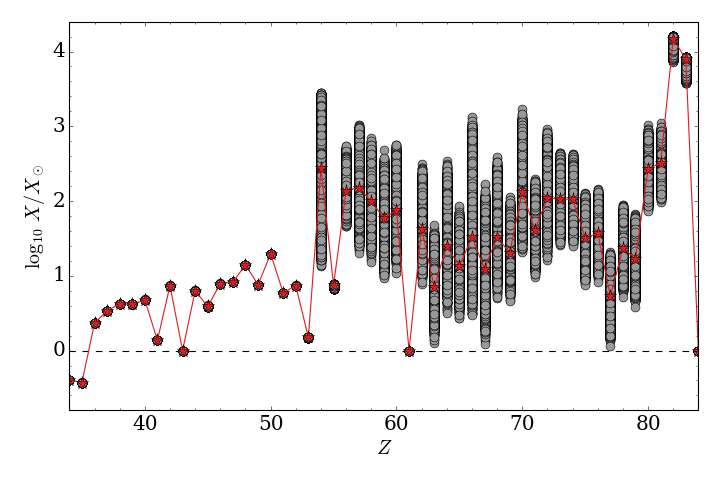

In [7]:
#ifig=ifig+1
#close(ifig)
#select_fig(ifig)

figure(figsize=(9,6))

# mc=0 is the template run with the reaction rate multiplication factors all equal to 1.0
# its n_el final elemental abundances are stored in the array el_abu_0[n_el]

#### It is important to note that mc runs are numbered from mc=1 to mc=10000, and
#### mc=0 is assigned to the template run with the reaction rate multiplication factors all equal to 1.0

# the number of MC runs
mc_runs = 10000 

# the results of the MC runs are here 
data_dir='/Users/dpa/my_github/github_nugrid/NuPPN/examples/RAWD_MC_sims_1zone/RAWD_MC_ppn_results/'

# this 1d array stores elemental abundances from the template run
el_abu_0 = np.linspace(0,0,n_el) 

# and this 2d array stores elemental abundances from the mc_runs
el_abu = np.zeros((mc_runs,n_el),dtype=float)

y_ppn_0 = np.linspace(0,0,n_el)

# read the results of the template run
mc = 0
ppn_file = 'RAWD_MC_ppn_iso_massf'+str(mc).zfill(5)+'.DAT'

f1=open(data_dir+ppn_file)
lines=f1.readlines()
f1.close()

massfrac=[]
A=[]
Z=[]
element = []
AI = []

for k in range(len(lines)):
    # skip header
    if k<7:
        continue
    
    line=lines[k]
    #print line[0:5].strip(), line[6:12].strip(), line[13:17].strip(),\
    #   line[24:35].strip(), line[37:39].strip(), line[39:43].strip()
    Z.append(line[6:12].strip()) # Z
    A.append(line[13:17].strip()) # A float
    massfrac.append(line[24:35].strip()) # massf
    element.append(line[37:39].strip()) # element (execept NEUT (first) and PROT (second))
    AI.append(line[39:43].strip()) # A integer

nnn = len(A)
element[0] = 'n'
AI[0] = '1'
element[1] = 'H'
AI[1] ='1'
element[nnn-2] = 'ALm'
AI[nnn-2] ='26'
element[nnn-1] = 'KRm'
AI[nnn-1] ='85'

#kp = 10
#print n_ppn
#print kp, float(Z[kp]), float(A[kp]), element[kp], int(AI[kp]), float(massfrac[kp]) 

n = len(A)
z_ppn = np.linspace(0,0,n_el)
y_ppn_0 = np.linspace(0,0,n_el)
j = 0

for i in range(n_el):
    z_ppn[j] = float(i)
    y_ppn_0[j] = 0.
    for kk in range(n):
        if float(Z[kk]) == float(i):
            y_ppn_0[j] += float(massfrac[kk])
            el_abu_0[j] = y_ppn_0[j]
    if i != 43 and i != 61:  
        if el_abu_sol[i]>1e-30 and y_ppn_0[j]>1e-30:
            y_ppn_0[j]=np.log10(y_ppn_0[j]/el_abu_sol[i])
    j += 1
    
# read the n_el elemental abundances from 10000 MC runs with randomly varied multiplication factors
# they will be stored in the array el_abu[0:9999,n_el]

#### It is important that the corresponding input data files have numbers from 1 to 10000 !!!!!
#### Therefore, I use mc1=mc+1 in the name of the input file

for mc in range(mc_runs):
    mc1 = mc+1
    ppn_file = 'RAWD_MC_ppn_iso_massf'+str(mc1).zfill(5)+'.DAT'
    #print ppn_file

    f1=open(data_dir+ppn_file)
    lines=f1.readlines()
    f1.close()

    massfrac=[]

    for k in range(len(lines)):
        # skip header
        if k<7:
            continue
    
        line=lines[k]
        #print line[0:5].strip(), line[6:12].strip(), line[13:17].strip(),\
        #   line[24:35].strip(), line[37:39].strip(), line[39:43].strip()
        massfrac.append(line[24:35].strip()) # massf

    #kp = 10
    #print n_ppn
    #print kp, float(Z[kp]), float(A[kp]), element[kp], int(AI[kp]), float(massfrac[kp]) 

    y_ppn = np.linspace(0,0,n_el)
    j = 0
    for i in range(n_el):
        y_ppn[j] = 0.
        for kk in range(n):
            if float(Z[kk]) == float(i):
                y_ppn[j] += float(massfrac[kk])
                el_abu[mc,j] = y_ppn[j]
        if i != 43 and i != 61:  
            if el_abu_sol[i]>1e-30 and y_ppn[j]>1e-30:
                y_ppn[j]=np.log10(y_ppn[j]/el_abu_sol[i])
        j += 1
    plt.plot(z_ppn,y_ppn,linestyle='None',marker='o',markerfacecolor=CB_color[6],markersize=8,linewidth=1)
        
plt.plot(z_ppn,y_ppn_0,color=CB_color[7],marker='*',markerfacecolor=CB_color[7],markersize=12,linewidth=1)

plt.xlabel('$Z$',fontsize=fsize)
plt.ylabel('$\log_{10}\ X/X_\odot$',fontsize=fsize)
    
plt.xlim(34,84)
plt.ylim(-0.8,4.4)
plt.hlines(0,0,85,linestyle='dashed')
plt.minorticks_on()

#label1 = "The benchmark one-zone model (cycle 891)"
#label2 = "The MC one-zone simulations (cycle 891)"
#plt.legend((label1,label2),loc=2,numpoints=1,frameon=False,fontsize=14)

tight_layout()
#plt.savefig("/Users/dpa/Documents/RAWD_MC_sims_results/fig_MC_1zone.pdf")

### Read in the final isotopic decayed abundances from all of the one-zone MC simulations, including the template one (mc=0)

In [11]:
# this cell is similar to the preceding one, except that here we read in the final isotopic abundances

data_dir='/Users/dpa/my_github/github_nugrid/NuPPN/examples/RAWD_MC_sims_1zone/RAWD_MC_ppn_results/'

mc_runs = 10000        

# mc=0, this is the template run with the multiplication factors all equal to 1.0
# its n_iso final isotopic abundances are stored in the array iso_abu_0[n_iso]

for mc in range(1):    
    ppn_file = 'RAWD_MC_ppn_iso_massf'+str(mc).zfill(5)+'.DAT'
    print ppn_file

    f1=open(data_dir+ppn_file)
    lines=f1.readlines()
    f1.close()

    massfrac=[]
    A=[]
    Z=[]
    element = []
    AI = []

    for k in range(len(lines)):
        # skip header
        if k<7:
            continue
    
        line=lines[k]
        #print line[0:5].strip(), line[6:12].strip(), line[13:17].strip(), line[24:35].strip(), line[37:39].strip(), line[39:43].strip()
        Z.append(line[6:12].strip()) # Z
        A.append(line[13:17].strip()) # A float
        massfrac.append(line[24:35].strip()) # massf
        element.append(line[37:39].strip()) # element (execept NEUT (first) and PROT (second))
        AI.append(line[39:43].strip()) # A integer

    n_iso = len(A)
    element[0] = 'n'
    AI[0] = '1'
    element[1] = 'H'
    AI[1] ='1'
    element[n_iso-2] = 'ALm'
    AI[n_iso-2] ='26'
    element[n_iso-1] = 'KRm'
    AI[n_iso-1] ='85'

    #kp = 0
    #print mc, n_iso
    #print kp, float(Z[kp]), float(A[kp]), element[kp], int(AI[kp]), float(massfrac[kp])

iso_z=np.linspace(0,0,n_iso)
iso_a=np.linspace(0,0,n_iso)
iso_name=["  " for x in range(n_iso)]
    
iso_abu_0 = np.linspace(0,0,n_iso)

for i in range(n_iso):
    iso_name[i] = element[i]
    iso_a[i] = float(A[i])
    iso_z[i] = float(Z[i])
    iso_abu_0[i] = float(massfrac[i])

# read in n_iso abundances from 10000 runs with randomly varied multiplication factors
# they are stored in the array iso_abu[0:9999,n_is0]

#### It is important that the corresponding input data files have numbers from 1 to 10000 !!!!!
#### Therefore, I use mc1=mc+1 in the name of the input file
    
iso_abu = np.zeros((mc_runs,n_iso),dtype=float) # this 2d array stores surface abundances from all mc_runs

for mc in range(mc_runs):
    mc1 = mc+1
    ppn_file = 'RAWD_MC_ppn_iso_massf'+str(mc1).zfill(5)+'.DAT'  # mc = 0,9999, while mc1 = 1,10000

    f1=open(data_dir+ppn_file)
    lines=f1.readlines()
    f1.close()

    massfrac=[]

    for k in range(len(lines)):
        # skip header
        if k<7:
            continue
    
        line=lines[k]
        massfrac.append(line[24:35].strip()) # massf
    for i in range(n_iso):    
        iso_abu[mc,i] = float(massfrac[i])
        
print mc, mc1, n_iso

RAWD_MC_ppn_iso_massf00000.DAT
9999 10000 1159


In [12]:
# el_abu_0[n_el] contains elemental abundances for the benchmark reaction rates with all multiplication 
# factors equal to 1.0
# el_abu[0:9999,n_el] contains elemental abundances for randomly varied multiplication factors that are 
# stored in the array mc_fuc[0:9999,n_fac]

# so, el_abu_0[i] is not equal to el_abu[0,i]

kp = 56
print kp, z_el[kp], el_name[kp], el_abu_0[kp]
print kp, z_el[kp], el_name[kp], el_abu[0,kp]

56 56.0 Ba 2.2316405e-06
56 56.0 Ba 1.2757354e-06


In [13]:
# print i that is equal to the proton number Z as well as the template and solar elemental abundances
print "\n"
for i in range(n_el):
    print i, el_name[i]+"  "+str(el_abu_0[i])+"     "+str(el_abu_sol[i])+"\n"



0 n  1e-99     1e-99

1 H  1.35449e-10     0.71539998055

2 He  0.0310315     0.27030000091

3 Li  9.00787e-09     9.79281710768e-09

4 Be  2e-99     1.6779801602e-10

5 B  8.27998e-12     4.20734648072e-09

6 C  0.0365074960008     0.00251261368552

7 N  1.8359003833e-16     0.000735772209369

8 O  0.14846516     0.00609232607245

9 F  0.063856     5.3616432419e-07

10 Ne  0.0901328752682     0.00133223326411

11 Na  9.91009e-07     3.1065056525e-05

12 Mg  0.562834     0.000752508576856

13 Al  0.00166052     5.9143643625e-05

14 Si  0.063962782     0.000706941682681

15 P  0.00133114     6.1930702445e-06

16 S  6.398651e-05     0.000328829571715

17 Cl  1.44049769e-07     8.7213110957e-06

18 Ar  1.61537202149e-07     7.08849138238e-05

19 K  3.099806e-08     3.25926390354e-06

20 Ca  5.00113888546e-07     6.82115517076e-05

21 Sc  7.41667000488e-09     4.9403398558e-08

22 Ti  3.888852e-07     3.31929394975e-06

23 V  1.0432e-08     3.37359697658e-07

24 Cr  1.3776756e-07     1.7

In [14]:
# iso_abu_0[n_iso] contains isotopc abundances for the benchmark reaction rates with all multiplication 
# factors equal to 1.0
# iso_abu[0:9999,n_iso] contains isotopic abundances for randomly varied multiplication factors that are 
# stored in the array mc_fuc[0:9999,n_fac]

# so, iso_abu_0[i] is not equal to iso_abu[0,i]

kp = 597
print kp, iso_z[kp], iso_a[kp], iso_name[kp], iso_abu_0[kp]
print kp, iso_z[kp], iso_a[kp], iso_name[kp], iso_abu[0,kp]

597 56.0 137.0 BA 1.76898e-07
597 56.0 137.0 BA 8.07063e-08


In [15]:
# print the full list of isotopes with their abundances from the template run
print "\n"
for i in range(n_iso):
    if (i>0 and int(iso_a[i])<999):
        print i, iso_name[i]+"-"+str(int(iso_a[i]))+" "+str(iso_abu_0[i])+"\n"



1 H-1 4.93282e-27

2 H-2 1.35449e-10

3 HE-3 3.94124e-14

4 HE-4 0.0310315

5 BE-7 1e-99

6 B-8 1e-99

7 LI-7 9.00787e-09

8 C-11 1.21866e-22

9 B-11 8.27998e-12

10 C-12 0.0361269

11 C-13 0.000380596

12 N-13 1.44128e-23

13 N-14 1.8359e-16

14 C-14 8.28714e-13

15 N-15 2.39172e-23

16 O-16 0.146383

17 O-17 0.00208216

18 O-18 1.5267e-15

19 F-17 8.72174e-26

20 F-18 3.51731e-20

21 F-19 0.063856

22 NE-20 0.0901327

23 NE-21 1.75148e-07

24 NE-22 1.20249e-10

25 NA-22 1.07749e-22

26 NA-23 9.91009e-07

27 MG-23 1e-99

28 MG-24 0.230599

29 MG-25 0.012202

30 MG-26 0.320033

31 AL-26 1e-99

32 AL-27 0.00166052

33 SI-27 1e-99

34 SI-28 0.000307282

35 SI-29 0.0486126

36 SI-30 0.0150429

37 P-31 0.00133114

38 S-31 1e-99

39 BE-8 1e-99

40 O-14 1e-99

41 O-15 1e-99

42 NA-21 1e-99

43 AL-25 1.17573e-23

44 P-29 1e-99

45 P-30 1.71027e-25

46 PB-206 1.0188e-05

47 PB-207 1.02794e-05

48 BI-211 1e-99

49 PO-210 2.77453e-16

50 F-20 3.28176e-18

51 NE-19 1e-99

52 NA-24 1.25092e-19




780 TB-150 1e-99

781 TB-151 1e-99

782 TB-152 1e-99

783 TB-153 1e-99

784 TB-154 1e-99

785 TB-155 1e-99

786 TB-156 1e-99

787 TB-157 1e-99

788 TB-158 1e-99

789 TB-159 3.31481e-09

790 TB-160 4.44918e-17

791 TB-161 7.15462e-21

792 TB-162 1e-99

793 TB-163 1e-99

794 TB-164 1e-99

795 TB-165 1e-99

796 TB-166 1e-99

797 TB-167 1e-99

798 TB-168 1e-99

799 TB-169 1e-99

800 DY-148 1e-99

801 DY-149 1e-99

802 DY-150 1e-99

803 DY-151 1e-99

804 DY-152 1e-99

805 DY-153 1e-99

806 DY-154 1e-99

807 DY-155 1e-99

808 DY-156 1e-99

809 DY-157 1e-99

810 DY-158 1.94348e-26

811 DY-159 1e-99

812 DY-160 6.1477e-09

813 DY-161 2.68538e-09

814 DY-162 1.24294e-08

815 DY-163 5.06162e-09

816 DY-164 2.65582e-08

817 DY-165 6.71333e-20

818 DY-166 1e-99

819 DY-167 1e-99

820 DY-168 1e-99

821 DY-169 1e-99

822 DY-170 1e-99

823 DY-171 1e-99

824 HO-153 1e-99

825 HO-154 1e-99

826 HO-155 1e-99

827 HO-156 1e-99

828 HO-157 1e-99

829 HO-158 1e-99

830 HO-159 1e-99

831 HO-160 1e-99

832 

### Read in the reaction rate multiplication factors from all of the MC simulations

In [16]:
file_mult = open("/Users/dpa/my_github/github_nugrid/NuPPN/examples/RAWD_MC_sims_1zone/RAWD_MC_ppn_results/reaction_factors_mult.txt",'r')
data = file_mult.readlines()
mult = [x.split() for x in data]
n_mc = int(mult[0][0]) # number of combinations of mult factors = number of mc runs
n_fac = int(mult[0][1]) # number of reactions with varied rates (52)

print n_mc, n_fac

mc_fac = np.zeros((n_mc,n_fac),dtype=float)

nn = 5 # maximum number of array elements per line in the data
kk = n_fac/nn # 10
mm = n_fac%nn # 2

nl = n_mc 
#nl = 2

k1 = 0
for i in range(nl):
    for k in range(kk):
        k1 = k1+1
        for n in range(nn):
            m = k*nn+n
            #if i >= 9999:
            #    print i, m, k1, n
            mc_fac[i,m] = float((mult[k1][n]).replace('D','E')) 
    if mm > 0:
        k1 = k1+1
    for n in range(mm):
        m = m+1
        #print i, m, k1, n
        mc_fac[i,m] = float((mult[k1][n]).replace('D','E'))
        
print nl, k1

10000 195
10000 390000


In [17]:
print mult[1][0], mc_fac[0,0] # the first number in the first raw of the list (the file reaction_factors_mult.txt)
print mult[390000][0], mc_fac[9999,190] # the first number in the last raw of the list

7.50388D-01 0.750388
1.60380D+01 16.038


In [18]:
file_mult = open("/Users/dpa/my_github/github_nugrid/NuPPN/examples/RAWD_MC_sims_1zone/RAWD_MC_ppn_results/reaction_factors.txt",'r')
data = file_mult.readlines()
fac = [x.split() for x in data]
name = []
mass = []
varmax = []
for k in range(len(fac)):
    if len(fac[k]) == 3:
        name.append(fac[k][0])
        mass.append(fac[k][1])
        varmax.append(float(fac[k][2]))
    if len(fac[k]) == 2:
        name.append(fac[k][0][0:2])
        mass.append(fac[k][0][2:])
        varmax.append(float(fac[k][1]))

# print the content of the file reaction_factors.txt
for k in range(len(fac)):
    print k, name[k], mass[k], varmax[k]

0 I 131 3.21590909091
1 I 132 4.93956043956
2 I 133 3.02272727273
3 I 134 5.57142857143
4 I 135 7.2131147541
5 I 136 8.12785388128
6 I 137 8.38709677419
7 XE 132 2.3352165725
8 XE 133 6.51145038168
9 XE 134 3.29441624365
10 XE 135 3.2972972973
11 XE 136 8.81651376147
12 XE 137 5.87073608618
13 XE 138 2.84090909091
14 XE 139 11.1168831169
15 CS 135 2.57668711656
16 CS 136 2.8431372549
17 CS 137 4.73214285714
18 CS 138 2.93728222997
19 CS 139 9.80132450331
20 CS 140 7.2
21 CS 141 7.89613848202
22 BA 137 1.966873706
23 BA 138 2.02090592334
24 BA 139 5.70833333333
25 BA 140 3.06870229008
26 BA 141 4.83050847458
27 BA 142 4.47494033413
28 BA 143 4.26633165829
29 BA 144 8.11096433289
30 LA 139 1.90960451977
31 LA 140 3.4375
32 LA 141 3.65422396857
33 LA 142 2.45348837209
34 LA 143 3.95161290323
35 LA 144 3.82911392405
36 LA 145 4.61126005362
37 LA 146 4.90039840637
38 LA 147 8.2304526749
39 CE 140 2.02830188679
40 CE 141 3.24742268041
41 CE 142 2.96551724138
42 CE 143 2.69081500647
43 CE 144

## Here, I plot a lognormal distribution of the mass fraction of an element, for which

$\log_{10}\mu (X) = \mu (\log_{10}X) + \frac{1}{2}\sigma^2(\log_{10}X)$.

<IPython.core.display.Javascript object>


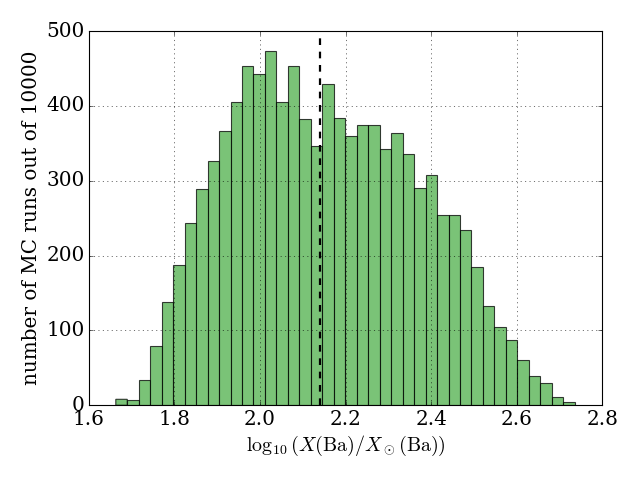

In [22]:
ifig=ifig+1
close(ifig)
select_fig(ifig)

i = 56 # charge number of the element to plot (see the element list abive)
el_to_plot=utils.get_el_from_z(i)

for k in range(n_el):
    if float(k)==z_el[i] and k != 0 and k != 43 and k != 61:
        yh = np.log10(el_abu[:,i]/el_abu_sol[k])
        #yh = np.log10(el_abu[::2,i]/el_abu_sol[k])  # skipping every other element (to reduce the number of MC sims)
        x_template = np.log10(el_abu_0[i]/el_abu_sol[k])
# the histogram of the data
n, mybins, patches = plt.hist(yh, 40, normed=0, facecolor=CB_color[2], alpha=0.75)

# best fit of data
(fit_mu, fit_sigma) = norm.fit(yh)

# add a 'best fit' line
y = 160.*normpdf(mybins, fit_mu, fit_sigma)
#l = plt.plot(mybins, y, color=CB_color[7], linewidth=2)

plt.xlabel('$\log_{10}\,(X(\mathrm{'+el_to_plot+'})/X_\odot(\mathrm{'+el_to_plot+'}))$',fontsize=fsize)
plt.ylabel('number of MC runs out of 10000',fontsize=fsize)
#plt.title("$\mathrm{Histogram\ of\ "+el_to_plot+"\ abundances}$")

#yhmax = float(100*((int(max(n))/100)+1))
yhmax = 500

yp = [0.,yhmax]
xt = [x_template,x_template]
plot(xt,yp,color='k',linestyle='dashed',linewidth=2)

#plt.xlim(0.75,2.75)
plt.xlim(1.6,2.8)
plt.ylim(0.,yhmax)

plt.grid(True)
tight_layout()
plt.show()

#plt.savefig("/Users/dpa/Documents/RAWD_MC_sims_results/Ba_hist.pdf")

<IPython.core.display.Javascript object>


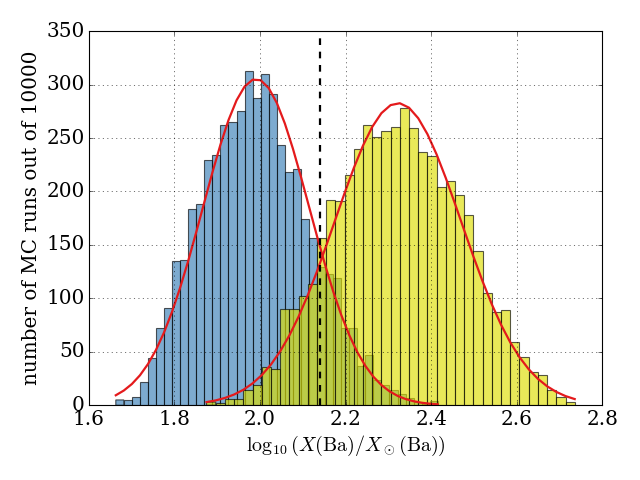

In [23]:
# the reaction I135(n,g) (mc_fac[:][4]) bifurcates the i process band path
# therefore, we make two histogram plots for the cases when mc_fac[:][4] >= 1.0 and mc_fac[:][4] < 1.0

ifig=ifig+1
close(ifig)
select_fig(ifig)

i = 56 # charge number of the element to plot
el_to_plot=utils.get_el_from_z(i)

yh = np.linspace(0,0,mc_runs)
imc = -1
yh2 = np.linspace(0,0,mc_runs)
imc2 = -1

for k in range(n_el):
    if float(k)==z_el[i] and k != 0 and k != 43 and k != 61:
        for mc in range(mc_runs):
            if mc_fac[mc][4] >= 1.0:
                imc += 1
                yh[imc] = np.log10(el_abu[mc,i]/el_abu_sol[k])
            else:
                imc2 += 1
                yh2[imc2] = np.log10(el_abu[mc,i]/el_abu_sol[k])
        #yh = np.log10(el_abu[:,i]/el_abu_sol[k])
        #yh = np.log10(el_abu[::2,i]/el_abu_sol[k])  # skipping every other element (to reduce the number of MC sims)
        x_template = np.log10(el_abu_0[i]/el_abu_sol[k])
# the histogram of the data
n, mybins, patches = plt.hist(yh[0:imc], 40, normed=0, facecolor=CB_color[0], alpha=0.65)
n2, mybins2, patches2 = plt.hist(yh2[0:imc2], 40, normed=0, facecolor=CB_color[8], alpha=0.65)

# best fit of data
(fit_mu, fit_sigma) = norm.fit(yh[0:imc])
(fit_mu2, fit_sigma2) = norm.fit(yh2[0:imc2])

# add a 'best fit' line
y = 95.*normpdf(mybins, fit_mu, fit_sigma)
l = plt.plot(mybins, y, color=CB_color[7], linewidth=2)

y2 = 105.*normpdf(mybins2, fit_mu2, fit_sigma2)
l2 = plt.plot(mybins2, y2, color=CB_color[7], linewidth=2)

plt.xlabel('$\log_{10}\,(X(\mathrm{'+el_to_plot+'})/X_\odot(\mathrm{'+el_to_plot+'}))$',fontsize=fsize)
plt.ylabel('number of MC runs out of 10000',fontsize=fsize)
#plt.title("$\mathrm{Histogram\ of\ "+el_to_plot+"\ abundances}$")

#yhmax = float(100*((int(max(n))/100)+1))
yhmax = 350

yp = [0.,yhmax]
xt = [x_template,x_template]
plot(xt,yp,color='k',linestyle='dashed',linewidth=2)

plt.xlim(1.6,2.8)
plt.ylim(0.,yhmax)

plt.grid(True)
tight_layout()
plt.show()

#plt.savefig("/Users/dpa/Documents/RAWD_MC_sims_results/Ba_hist2.pdf")

<IPython.core.display.Javascript object>


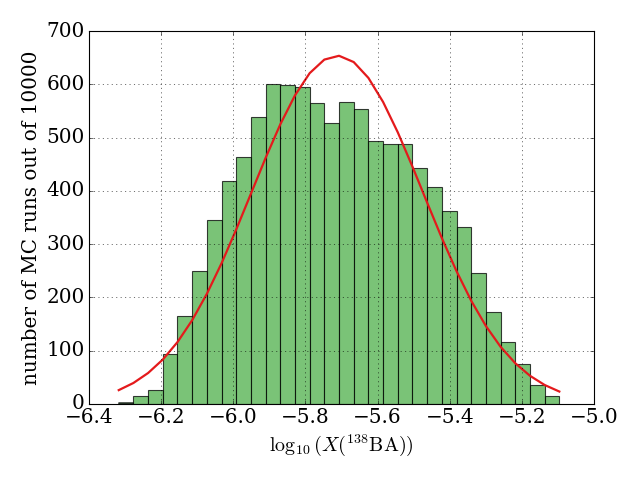

In [24]:
ifig=ifig+1
close(ifig)
select_fig(ifig)

i = 598  # the i-th isotope will be plotted

yh = np.log10(iso_abu[:,i])
#yh = np.log10(iso_abu[::2,i])  # skipping every other element (to reduce the number of MC sims)

# the histogram of the data
n, mybins, patches = plt.hist(yh, 30, normed=0, facecolor=CB_color[2], alpha=0.75)

plt.xlabel('$\log_{10}\,(X(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'}))$',fontsize=fsize)
plt.ylabel('number of MC runs out of 10000',fontsize=fsize)
#plt.title("$\mathrm{Histogram\ of\ "+el_to_plot+"\ abundances}$")

# best fit of data
(fit_mu, fit_sigma) = norm.fit(yh)

# add a 'best fit' line
y = 390*normpdf(mybins, fit_mu, fit_sigma)
l = plt.plot(mybins, y, color=CB_color[7], linewidth=2)

yhmax = 700
plt.ylim(0.,yhmax)

plt.grid(True)
tight_layout()
plt.show()
#plt.savefig("/Users/dpa/Documents/MC_sims_results/Zr_hist.pdf")
#plt.savefig("/Users/dpa/Documents/MC_sims_results/Y_hist.pdf")

<IPython.core.display.Javascript object>


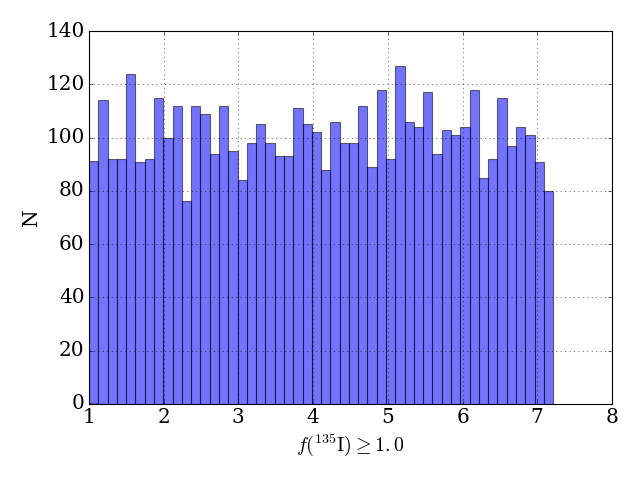

In [25]:
ifig=ifig+1
close(ifig)
select_fig(ifig)

k = 4  # choose a reaction from the above list

yh = np.linspace(0,0,mc_runs)
j = 0
for mc in range(mc_runs):
    if mc_fac[mc,k] >= 1.0:
        j = j+1
        yh[j] = mc_fac[mc,k]

# the histogram of the data
n, bins, patches = plt.hist(yh[1:j], 50, normed=0, facecolor='blue', alpha=0.55)

plt.xlabel("$f("+"^{"+mass[k]+"}\mathrm{"+name[k]+"})\geq 1.0$",fontsize=fsize)
plt.ylabel('N',fontsize=fsize)
plt.grid(True)
tight_layout()
plt.show()

<IPython.core.display.Javascript object>


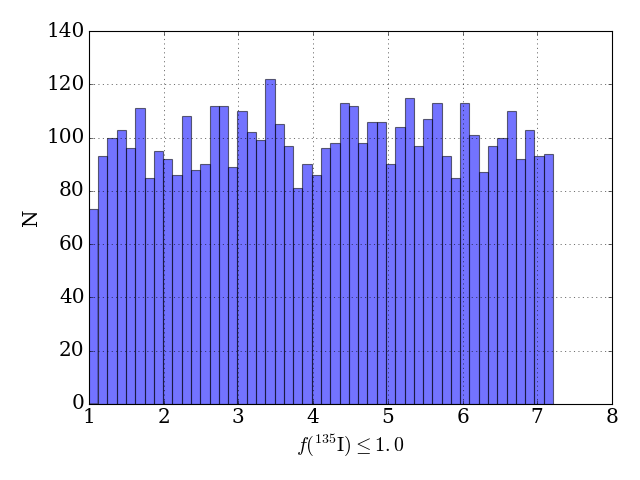

In [27]:
ifig=ifig+1
close(ifig)
select_fig(ifig)

k = 4  # choose a reaction from the above list

yh = np.linspace(0,0,mc_runs)
j = 0
for mc in range(mc_runs):
    if mc_fac[mc,k] <= 1.0:
        j = j+1
        yh[j] = 1./mc_fac[mc,k]

# the histogram of the data
n, bins, patches = plt.hist(yh[1:j], 50, normed=0, facecolor='blue', alpha=0.55)

plt.xlabel("$f("+"^{"+mass[k]+"}\mathrm{"+name[k]+"})\leq 1.0$",fontsize=fsize)
plt.ylabel('N',fontsize=fsize)
plt.grid(True)
tight_layout()
plt.show()

<IPython.core.display.Javascript object>


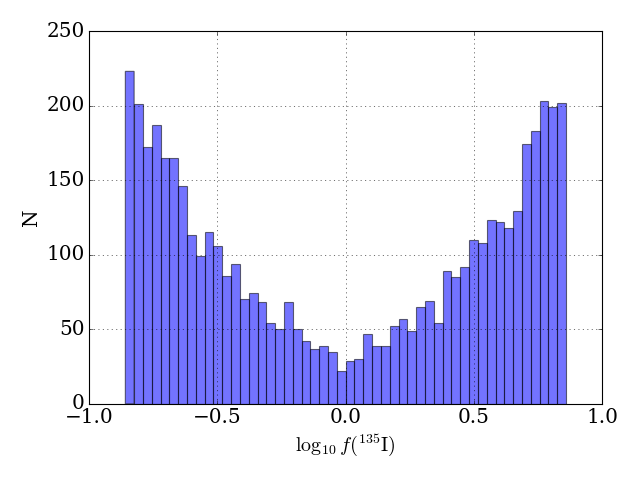

In [28]:
ifig=ifig+1
close(ifig)
select_fig(ifig)

k = 4  # choose a reaction from the above list

yh = np.log10(mc_fac[:,k])

# the histogram of the data
n, bins, patches = plt.hist(yh[1:j], 50, normed=0, facecolor='blue', alpha=0.55)

plt.xlabel("$\log_{10}\,f("+"^{"+mass[k]+"}\mathrm{"+name[k]+"})$",fontsize=fsize)
plt.ylabel('N',fontsize=fsize)
plt.grid(True)
tight_layout()
plt.show()

In [29]:
def PearsonCoefficient(x, y):
    assert len(x) == len(y)
    n = len(x)
    #print n
    assert n > 0
    avg_x = float(sum(x)) / n
    avg_y = float(sum(y)) / n
    #print avg_x, avg_y
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    p = math.sqrt(xdiff2 * ydiff2)
    if p == 0:
        return None
    return diffprod / p

In [32]:
i = 598  # choose an isotope from the above list

y = iso_abu[:,i]

print i, iso_name[i], int(iso_a[i]), "\n"

for k in range(n_fac):
    x = mc_fac[:,k]
    r = stats.pearsonr(x, y)
    if np.abs(r[0]) > 0.1:
        print k, name[k], mass[k], r[0], r[1]  

598 BA 138 

4 I 135 -0.654121737664 0.0
11 XE 136 0.141401322345 7.96380388418e-46
17 CS 137 -0.316688340417 9.03556956365e-232
18 CS 138 -0.135574860558 3.09993090248e-42
23 BA 138 -0.309102447929 2.46329948717e-220


10000 -0.858026880117 0.858107502713
1.0 0.606675769875 1.88645449575


<IPython.core.display.Javascript object>


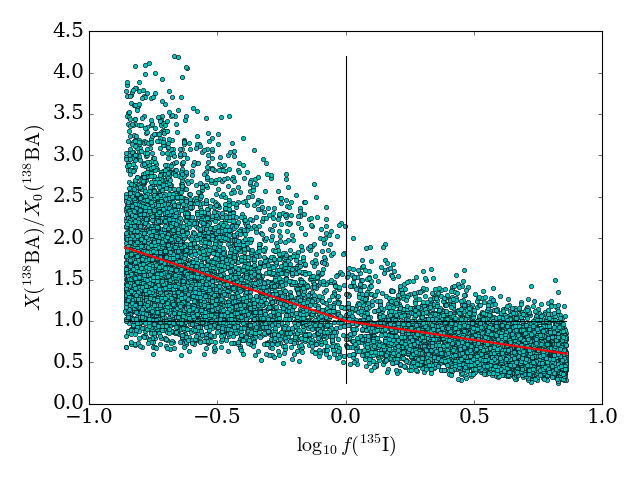

In [34]:
i = 598  # choose an isotope from the above list
k = 4   # choose a reaction from the above list

x = np.log10(mc_fac[:,k])
y = (iso_abu[:,i]/iso_abu_0[i])

xmax = max(x)
xmin = min(x)
nx = size(x)

print nx, xmin, xmax

ymax = 0.
kmax = 0
for kk in range(nx):
    if x[kk] > 0.95*xmax:
        ymax = ymax+y[kk]
        kmax += 1
ymax = ymax/kmax

ymin = 0.
kmin = 0
for kk in range(nx):
    if x[kk] < 0.95*xmin:
        ymin = ymin+y[kk]
        kmin += 1
ymin = ymin/kmin

y0 = 1. # 0.

x0max = [0,xmax]
y0max = [y0,ymax]

x0min = [xmin,0]
y0min = [ymin,y0]

y00 = [y0,y0]
x00 = [xmin,xmax]

xx0 = [0,0]
yy0 = [min(y),max(y)]

print y0, ymax, ymin
              
ifig=ifig+1
close(ifig)
select_fig(ifig)

plt.plot(x,y,'co',markersize=4)
plt.xlabel("$\log_{10}\,f("+"^{"+mass[k]+"}\mathrm{"+name[k]+"})$",fontsize=fsize)
#plt.ylabel('$\log_{10}\,(X(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'})/X_0(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'}))$',fontsize=fsize)
#plt.xlabel("$f("+"^{"+fac[k][1]+"}\mathrm{"+fac[k][0]+"})$",fontsize=fsize)
plt.ylabel('$X(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'})/X_0(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'})$',fontsize=fsize)
plt.plot(x00,y00,'k-',markersize=12,linewidth=1)
plt.plot(xx0,yy0,'k-',markersize=12,linewidth=1)
plt.plot(x0max,y0max,'r-',markersize=12,linewidth=2)
plt.plot(x0min,y0min,'r-',markersize=12,linewidth=2)
#plt.ylim(-1.0,1.0)
tight_layout()

10000
0.0 0.0875542239644 0.178442994913


<IPython.core.display.Javascript object>


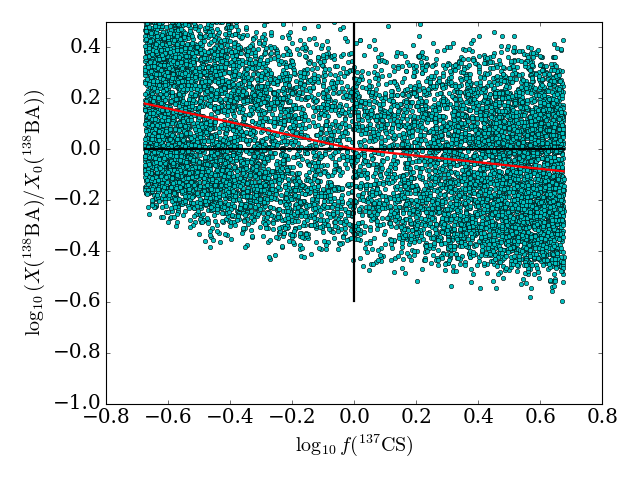

In [35]:
i = 598  # choose an isotope from the above list
k = 17  # choose a reaction from the above list

k_ge1 = 0
for mc in range(mc_runs):
    if mc_fac[mc,k] >= -1.0:
        k_ge1 += 1
print k_ge1

fac_ge1 = np.linspace(0,0,k_ge1)
ab_ge1 = np.linspace(0,0,k_ge1)

kk = 0
for mc in range(mc_runs):
    if mc_fac[mc,k] >= -1.0:
        fac_ge1[kk] = mc_fac[mc,k]
        ab_ge1[kk] = iso_abu[mc,i]/iso_abu_0[i]
        kk += 1
        
x = np.log10(fac_ge1[:])
y = np.log10(ab_ge1[:])

xmax = max(x)
xmin = min(x)
nx = size(x)

ymax = 0.
kmax = 0
for kk in range(nx):
    if x[kk] > 0.95*xmax:
        ymax = ymax+y[kk]
        kmax += 1
ymax = ymax/kmax

ymin = 0.
kmin = 0
for kk in range(nx):
    if x[kk] < 0.95*xmin:
        ymin = ymin+y[kk]
        kmin += 1
ymin = ymin/kmin

y0 = np.log10(iso_abu_0[i]/iso_abu_0[i])

y0max = [y0,ymax]
x0max = [0,xmax]
y0min = [y0,ymin]
x0min = [0,xmin]
y00 = [y0,y0]
x00 = [xmin,xmax]

xx0 = [0,0]
yy0 = [min(y),max(y)]

print y0, np.abs(ymax-y0), np.abs(ymin-y0)
              
ifig=ifig+1
close(ifig)
select_fig(ifig)

plt.plot(x,y,'co',markersize=4)
plt.xlabel("$\log_{10}\,f("+"^{"+mass[k]+"}\mathrm{"+name[k]+"})$",fontsize=fsize)
plt.ylabel('$\log_{10}\,(X(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'})/X_0(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'}))$',fontsize=fsize)
#plt.xlabel("$f("+"^{"+fac[k][1]+"}\mathrm{"+fac[k][0]+"})$",fontsize=fsize)
#plt.ylabel('$X(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'})/X_0(^{'+str(int(iso_a[i]))+'}\mathrm{'+iso_name[i]+'})$',fontsize=fsize)
plt.plot(x00,y00,'k-',markersize=12,linewidth=2)
plt.plot(xx0,yy0,'k-',markersize=12,linewidth=2)
plt.plot(x0max,y0max,'r-',markersize=12,linewidth=2)
plt.plot(x0min,y0min,'r-',markersize=12,linewidth=2)
plt.ylim(-1.0,0.5)
tight_layout()

In [36]:
iplot = [56,57,58,59,60,62,63,64,65,66,67,68,69,70,71,72]
for i in range(len(iplot)):
    print el_name[iplot[i]]

Ba
La
Ce
Pr
Nd
Sm
Eu
Gd
Tb
Dy
Ho
Er
Tm
Yb
Lu
Hf


<IPython.core.display.Javascript object>


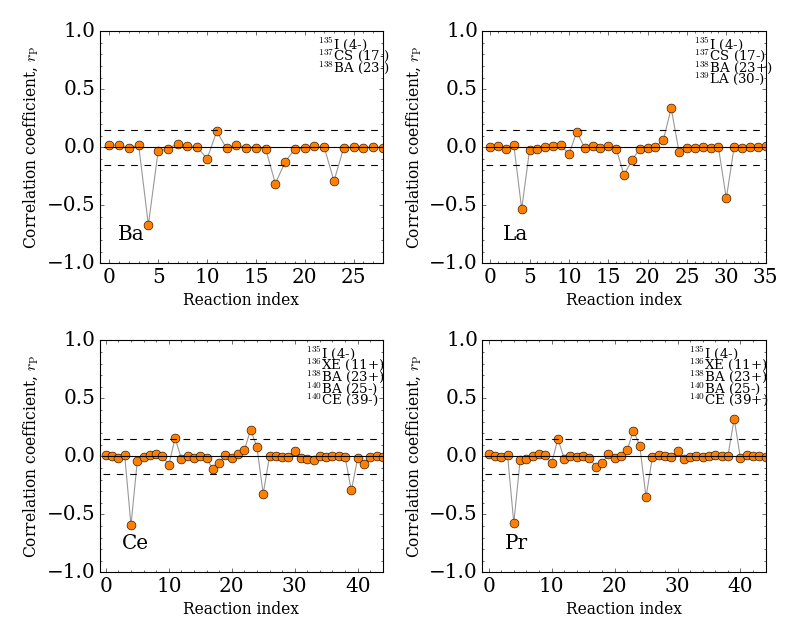

56 Ba
4 I 135 -0.668853251752 0.0
17 CS 137 -0.313627379356 4.0817253019e-227
23 BA 138 -0.292477263708 1.95351591035e-196


57 La
4 I 135 -0.533196630843 0.0
17 CS 137 -0.239872048116 7.32625944764e-131
23 BA 138 0.335223251949 3.77227359264e-261
30 LA 139 -0.442264439571 0.0


58 Ce
4 I 135 -0.5929123585 0.0
11 XE 136 0.157094017076 2.84372629785e-56
23 BA 138 0.231301745997 1.45498340791e-121
25 BA 140 -0.321956411554 6.53238817263e-240
39 CE 140 -0.293921329326 1.89384541469e-198


59 Pr
4 I 135 -0.57436349546 0.0
11 XE 136 0.151925916794 1.04801683845e-52
23 BA 138 0.222323660617 3.17462504199e-112
25 BA 140 -0.351294678179 2.51670004569e-288
39 CE 140 0.324871131584 1.73745338384e-244




In [37]:
#ifig=ifig+1
#close(ifig)
#select_fig(ifig)

figure(figsize=(10,8))

iso_name_plot=["    " for x in range(n_fac)]

iplot = [56,57,58,59,60,62,63,64,65,66,67,68,69,70,71,72]

i_sub = 0

kmin = []

rmin = 0.15  # the minimum value for the correlation coefficient

#for ip in range(len(iplot)):
for ip in range(0,4):
    i = iplot[ip]
    k_plot = -1
    i_sub += 1
    #y = np.log10(el_abu[:,i]/el_abu_0[i])
    y = (el_abu[:,i]/el_abu_0[i])
    #y = el_abu[:,i]
    #y = np.log10(el_abu[:,i])

    print i, el_name[i]

    x_plot = np.linspace(0,0,n_fac)
    y_plot = np.linspace(0,0,n_fac)

    for k in range(n_fac):
        x = mc_fac[:,k]
        r = stats.pearsonr(x, y)
        x_plot[k] = k
        y_plot[k] = r[0]
        if np.abs(y_plot[k]) >= rmin:
            sign = '+'
            kmin.append(k)
            if r[0] < 0:
                sign = '-'
            k_plot += 1
            iso_name_plot[k_plot] = '$^{'+mass[k]+'}$'+name[k]+' ('+str(k)+sign+')'               
    
        if np.abs(r[0]) >= rmin:
            print k, name[k], mass[k], r[0], r[1]
    print "\n"

    plt.subplot(2,2,i_sub)
    #plt.plot(x_plot,y_plot,'ro')
    plt.plot(x_plot,y_plot,color=CB_color[6],marker='o',markerfacecolor=CB_color[1],markersize=8)
    plt.xlim(min(kmin)-5,max(kmin)+5)
    plt.ylim(-1,1)
    plt.xlabel('Reaction index',fontsize=14)
    plt.ylabel('Correlation coefficient, $r_{\mathrm{P}}$',fontsize=14)
    plt.minorticks_on()
    plt.text(min(kmin)-5+0.1*(max(kmin)-min(kmin)),-0.8,el_name[i],fontsize=18)
    if k_plot > -1:
        for kk in range (k_plot+1):
            plt.text(max(kmin)+5-0.35*(max(kmin)-min(kmin)),0.75-(kk-1)*0.1,iso_name_plot[kk],fontsize=12)
    
    xx = [-0.5,194.5]
    yy = [rmin,rmin]
    plt.plot(xx,yy,'k--')
    xx = [-0.5,194.5]
    yy = [-rmin,-rmin]
    plt.plot(xx,yy,'k--')
    xx = [-0.5,194.5]
    yy = [0,0]
    plt.plot(xx,yy,'k-')
    
tight_layout()
plt.show()
#plt.savefig("/Users/dpa/Documents/RAWD_MC_sims_results/MC_correlations_rmin15_fig1.pdf")

<IPython.core.display.Javascript object>


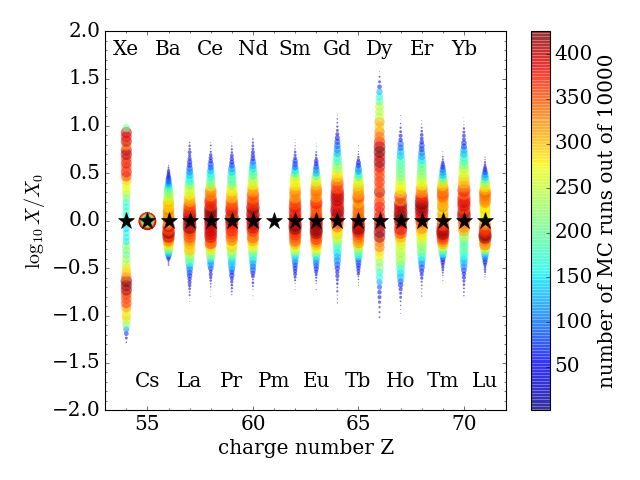

In [38]:
ifig=ifig+1
close(ifig)
select_fig(ifig)

i1=54
i2=72
ni=i2-i1+1

for i in range(i1,i2):
    el_to_plot=utils.get_el_from_z(i)
    yh = np.log10(el_abu[:,i]/el_abu_0[i])
    # the histogram of the data
    if i != 43 and i != 61:
        n, mybins, patches = plt.hist(yh, 50, normed=0, facecolor='green', alpha=0)

        area = ((n/3)) 

        nn = len(n)
        x = np.linspace(i,i,nn)
        y = np.linspace(0,0,nn)
        for j in range(nn):
            y[j] = 0.5*(mybins[j]+mybins[j+1])

        plt.scatter(x, y, marker='o', s=area, c=n, alpha=0.55, edgecolor='', cmap='jet')

x0 = np.linspace(0,0,ni)
y0 = np.linspace(-99.,-99.,ni)
ii = 0
for i in range(i1,i2):
    if i != 43:
        x0[ii] = float(i)
        y0[ii] = np.log10(el_abu_0[i]/el_abu_0[i])
        ii += 1
plt.plot(x0,y0,'k*',markersize=16)
    
ax = plt.colorbar()
ax.set_label('number of MC runs out of 10000')
plt.xlim(i1-1,i2)
plt.ylim(-2.0,2.0)
plt.xlabel('charge number Z')
plt.ylabel('$\log_{10}\,X/X_0$')
plt.minorticks_on()
#plt.hlines(0,0,85)
for i in range(i1,i2):
    if i != 43:
        el_to_plot=utils.get_el_from_z(i)
        if i%2 == 0:
            plt.text(i,1.75,el_to_plot,ha='center')
        else:
            plt.text(i,-1.75,el_to_plot,ha='center')
tight_layout()
plt.show()
#plt.savefig("/Users/dpa/Documents/MC_sims_results/MC_uncertainties2.pdf")

<IPython.core.display.Javascript object>


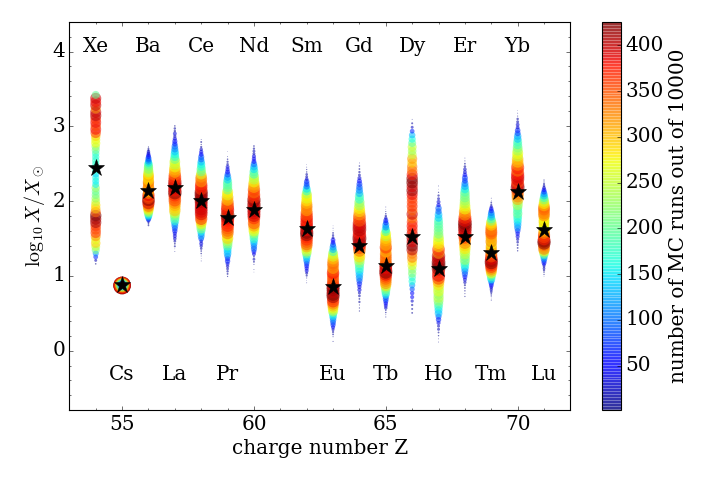

In [39]:
#ifig=ifig+1
#close(ifig)
#select_fig(ifig)

figure(figsize=(9,6))

i1 = 54 
i2 = 72
ni = i2-i1+1

for i in range(i1,i2):
    el_to_plot=utils.get_el_from_z(i)
    if float(i)==z_el[i] and i != 43 and i != 61:
        if el_abu_sol[i]>1e-30:
            yh = np.log10(el_abu[:,i]/el_abu_sol[i])
            x_template = np.log10(el_abu_0[i]/el_abu_sol[i])
    # the histogram of the data
    if i != 43 and i != 61:
        n, mybins, patches = plt.hist(yh, 50, normed=0, facecolor='green', alpha=0)

        area = ((n/3)) 

        nn = len(n)
        x = np.linspace(i,i,nn)
        y = np.linspace(0,0,nn)
        for j in range(nn):
            y[j] = 0.5*(mybins[j]+mybins[j+1])

        plt.scatter(x, y, marker='o', s=area, c=n, alpha=0.55, edgecolor='', cmap='jet')

x0 = np.linspace(0,0,ni)
y0 = np.linspace(-99.,-99.,ni)
ii = 0
for i in range(i1,i2):
    x0[ii] = float(i)
    if float(i)==z_el[i] and i != 43 and i != 61:
        if el_abu_sol[i]>1e-30:
            y0[ii] = np.log10(el_abu_0[i]/el_abu_sol[i])
    ii += 1
plt.plot(x0,y0,'k*',markersize=16)
#plt.errorbar(x0,fit_mu,yerr=fit_sigma,fmt='ks',markersize=8)
    
ax = plt.colorbar()
ax.set_label('number of MC runs out of 10000')
#plt.xlim(35,47)
plt.xlim(i1-1,i2)
#plt.ylim(-1.2,3.2)
plt.ylim(-0.8,4.4)
plt.xlabel('charge number Z')
plt.ylabel('$\log_{10}\,X/X_\odot$')
plt.minorticks_on()
#plt.hlines(0,0,85)
for i in range(i1,i2):
    if i != 43 and i != 61:
        el_to_plot=utils.get_el_from_z(i)
        if i%2 == 0:
            plt.text(i,4,el_to_plot,ha='center')
        else:
            plt.text(i,-0.4,el_to_plot,ha='center')
tight_layout()
plt.show()
#plt.savefig("/Users/dpa/Documents/RAWD_MC_sims_results/MC_color_uncertainties.pdf")

<IPython.core.display.Javascript object>


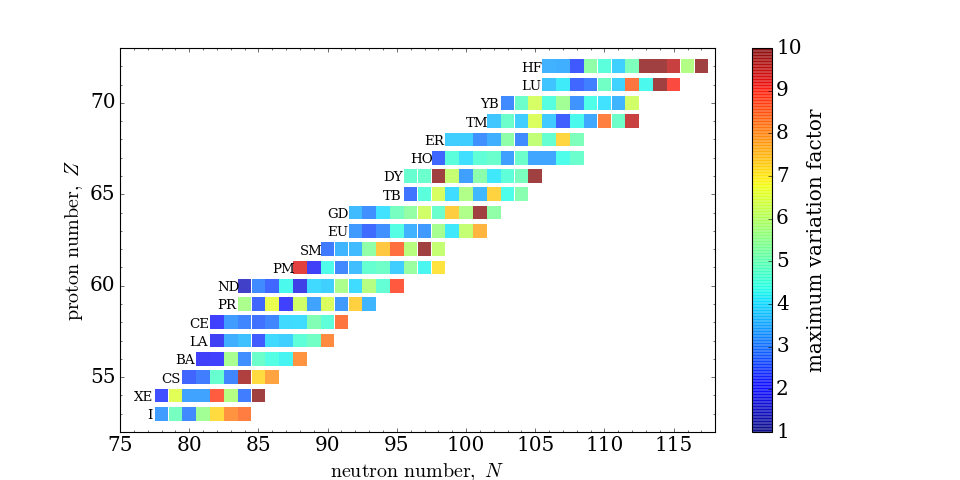

In [40]:
#ifig=ifig+1
#close(ifig)
#select_fig(ifig)

figure(figsize=(12,6))

i1 = 53
i2 = 72
l_z = i1

cmap=plt.get_cmap("jet")

k0 = 0
elements =[]
nn0 = []
edgec = []

elem0 = name[k0]
elements.append(elem0)
nn0.append(int(mass[k0])-l_z)

sym_col = [0]*n_fac
el_z = [0]*n_fac
el_n = [0]*n_fac

for k in range(n_fac):
    elem = name[k]
    edgecapp = ''
    if name[k] == 'XE' and mass[k] == '136':
        edgecapp ='k'
    edgec.append(edgecapp)
    if elem != elem0:
        elem0 = elem
        elements.append(elem0)
        nn0.append(int(mass[k])-l_z)
        l_z += 1
    sym_col[k] = varmax[k]
    el_z[k] = l_z
    el_n[k] = int(mass[k])-l_z
    
plt.scatter(el_n, el_z, marker='s', s=150, c=sym_col, alpha=0.75, edgecolor='', cmap='jet')
    
plt.xlabel('$\mathrm{neutron\ number},\ N$',fontsize=fsize)
plt.ylabel('$\mathrm{proton\ number},\ Z$',fontsize=fsize)
plt.xlim(75,118)
plt.ylim(52,73)
plt.minorticks_on()
#plt.grid()
for i in range(i2-i1+1):
    dx=3.
    if i == 0:
        dx = 1.
    text(nn0[i]-dx,i+i1-0.3,elements[i],fontsize=12)

ax = plt.colorbar()
ax.set_label('maximum variation factor')

plt.clim(1,10)
        
plt.show()
#plt.savefig("/Users/dpa/Documents/RAWD_MC_sims_results/george.pdf")    

In [41]:
for k in range(len(fac)):
    if varmax[k] > 10.:
        print k, name[k], mass[k], varmax[k]

14 XE 139 11.1168831169
89 SM 159 13.6016949153
110 GD 165 10.5769230769
123 DY 164 18.9493433396
130 DY 171 11.350737798
181 LU 185 83.2369942197
190 HF 185 16.0591133005
191 HF 186 28.3798882682
194 HF 189 10.9154929577


In [42]:
# correlations between the final abundances of the 16 selected elements
for ip in range(0,16):
    i1 = iplot[ip]
    y = (el_abu[:,i1]/el_abu_0[i1])
    for ip2 in range(0,16):
        i2 = iplot[ip2]
        y2 = (el_abu[:,i2]/el_abu_0[i2])

        r = stats.pearsonr(y, y2)
        print el_name[i1], el_name[i2], r[0], r[1]
        print "\n"

Ba Ba 1.0 0.0


Ba La 0.575208044336 0.0


Ba Ce 0.586166136527 0.0


Ba Pr 0.557322881101 0.0


Ba Nd 0.526961422425 0.0


Ba Sm 0.562122550274 0.0


Ba Eu 0.577079440279 0.0


Ba Gd 0.448696326097 0.0


Ba Tb 0.585931108818 0.0


Ba Dy 0.294803995353 1.09860086938e-199


Ba Ho 0.413074497457 0.0


Ba Er 0.443685291157 0.0


Ba Tm 0.614919042241 0.0


Ba Yb 0.463880192754 0.0


Ba Lu 0.633349138244 0.0


Ba Hf 0.515538937609 0.0


La Ba 0.575208044336 0.0


La La 1.0 0.0


La Ce 0.618268948336 0.0


La Pr 0.579683449833 0.0


La Nd 0.512143790917 0.0


La Sm 0.526611772846 0.0


La Eu 0.538403853269 0.0


La Gd 0.418167817541 0.0


La Tb 0.542290985751 0.0


La Dy 0.275325414309 2.0704283609e-173


La Ho 0.369300408516 1.01036424575e-320


La Er 0.414490638597 0.0


La Tm 0.560633714939 0.0


La Yb 0.425409688724 0.0


La Lu 0.572372343175 0.0


La Hf 0.451957888659 0.0


Ce Ba 0.586166136527 0.0


Ce La 0.618268948336 0.0


Ce Ce 1.0 0.0


Ce Pr 0.716169130175 0.0


Ce Nd 0.691210875

In [43]:
# same as above, but for a group with mc_fac[mc][4] >= facfac, where 4 is (n,g) rate of I-135
yh = np.linspace(0,0,mc_runs)
imc = 0
yh2 = np.linspace(0,0,mc_runs)
imc2 = 0

facfac = 0.0

for ip in range(0,16):
    imc = -1
    i1 = iplot[ip]
    for mc in range(mc_runs):
        if mc_fac[mc][4] >= facfac:
            imc += 1
            yh[imc] = (el_abu[mc,i1]/el_abu_0[i1])
    for ip2 in range(0,16):
        imc2 = -1
        i2 = iplot[ip2]
        for mc in range(mc_runs):
            if mc_fac[mc][4] >= facfac:
                imc2 += 1
                yh2[imc2] = (el_abu[mc,i2]/el_abu_0[i2])

        r = stats.pearsonr(yh[0:imc], yh2[0:imc2])
        print el_name[i1], el_name[i2], r[0], r[1]
        print "\n"
        
#print yh[0:imc]

Ba Ba 1.0 0.0


Ba La 0.575212919059 0.0


Ba Ce 0.586166750111 0.0


Ba Pr 0.557304209335 0.0


Ba Nd 0.526942880607 0.0


Ba Sm 0.562102399186 0.0


Ba Eu 0.57706101433 0.0


Ba Gd 0.448673861481 0.0


Ba Tb 0.585912735088 0.0


Ba Dy 0.294771580416 1.27669539521e-199


Ba Ho 0.4130458122 0.0


Ba Er 0.443664850373 0.0


Ba Tm 0.614901695774 0.0


Ba Yb 0.463860911978 0.0


Ba Lu 0.633333548061 0.0


Ba Hf 0.515532922125 0.0


La Ba 0.575212919059 0.0


La La 1.0 0.0


La Ce 0.618268557058 0.0


La Pr 0.579692631543 0.0


La Nd 0.512149323026 0.0


La Sm 0.526623309425 0.0


La Eu 0.538413191041 0.0


La Gd 0.418171757667 0.0


La Tb 0.542301416711 0.0


La Dy 0.275326898994 2.14425881197e-173


La Ho 0.369306662381 1.05828861339e-320


La Er 0.41449312955 0.0


La Tm 0.560646716009 0.0


La Yb 0.425412164081 0.0


La Lu 0.572382197795 0.0


La Hf 0.451957324569 0.0


Ce Ba 0.586166750111 0.0


Ce La 0.618268557058 0.0


Ce Ce 1.0 0.0


Ce Pr 0.716176500883 0.0


Ce Nd 0.69121547861 